# Potential Fish Zone Identification
Credits:
   Enusha.m

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
np.random.seed(40)

In [25]:
td = pd.read_csv('sample_nan.csv')
td

,Year,Month,SST,SSC,AT,RH,SLP,TC,TOTALOIL,Label
0,2010,1,28.659535,0.24,27.927021,76.067391,1013.386250,3.438298,48131.725,PFZ
1,2010,2,28.506889,0.19,28.140408,74.979592,1012.342449,2.791837,20158.942,PFZ
2,2010,3,29.359070,0.18,28.922500,76.359574,1012.280417,3.511111,33400.703,NPFZ
3,2010,4,30.385854,0.26,29.801250,78.610417,1009.744792,4.110638,7268.411,NPFZ
4,2010,5,30.749362,0.24,30.292000,77.500000,1008.289600,4.424000,16186.259,NPFZ
5,2010,6,29.269796,0.26,28.539796,81.128571,1007.825600,6.142857,15007.071,NPFZ
6,2010,7,28.494490,0.12,27.649388,83.665306,1007.790400,6.606122,15495.134,NPFZ
7,2010,8,27.470444,0.19,27.063043,83.360870,1009.054681,5.747826,6259.526,NPFZ
8,2010,9,28.020000,0.17,27.724167,81.706250,1008.252000,5.122449,29318.867,PFZ
9,2010,10,29.010773,0.21,28.369584,79.348464,1010.446150,4.794784,37132.879,PFZ


In [4]:
'''
Sea Surface Temperature, Chlorophyll, 
Relative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.

'''

'\nSea Surface Temperature, Chlorophyll, \nRelative Humidity, Sea Level Pressure, Air Temperature, Total Cloudiness and Total Fish catch data.\n\n'

# Remove year and Month and Label

In [26]:
df =  td[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL']]
df

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,28.659535,0.24,27.927021,76.067391,1013.386250,3.438298,48131.725
1,28.506889,0.19,28.140408,74.979592,1012.342449,2.791837,20158.942
2,29.359070,0.18,28.922500,76.359574,1012.280417,3.511111,33400.703
3,30.385854,0.26,29.801250,78.610417,1009.744792,4.110638,7268.411
4,30.749362,0.24,30.292000,77.500000,1008.289600,4.424000,16186.259
5,29.269796,0.26,28.539796,81.128571,1007.825600,6.142857,15007.071
6,28.494490,0.12,27.649388,83.665306,1007.790400,6.606122,15495.134
7,27.470444,0.19,27.063043,83.360870,1009.054681,5.747826,6259.526
8,28.020000,0.17,27.724167,81.706250,1008.252000,5.122449,29318.867
9,29.010773,0.21,28.369584,79.348464,1010.446150,4.794784,37132.879


# Shuffle the dataset and apply interpolate method

In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
nedf = df.interpolate(method='index', axis=0).ffill().bfill()

In [27]:
nedf = nedf.astype("float")
nedf

,SST,SSC,AT,RH,SLP,TC,TOTALOIL
0,29.356190,0.1600,29.117391,77.686667,1009.645435,3.717778,14151.874000
1,29.036667,0.1800,28.596875,81.393617,1007.970417,5.682979,10643.353000
2,28.392000,0.1200,27.458889,74.524444,1009.368636,3.581395,71906.825000
3,28.382548,0.1750,27.502351,74.745149,1011.411477,3.365088,66405.234000
4,28.373095,0.2300,27.545814,74.965854,1013.454318,3.148780,60903.643000
5,28.400446,0.2275,27.752527,76.258111,1012.734249,3.588713,53994.833500
6,28.427798,0.2250,27.959240,77.550369,1012.014180,4.028646,47086.024000
7,28.455149,0.2225,28.165953,78.842626,1011.294112,4.468578,40177.214500
8,28.482500,0.2200,28.372667,80.134884,1010.574043,4.908511,33268.405000
9,29.010773,0.2100,28.369584,79.348464,1010.446150,4.794784,37132.879000


# Create label

In [9]:
ssc = np.array(nedf['SSC'])
sst = np.array(nedf['SST'])
fc = np.array(nedf['TOTALOIL'])

In [10]:
lab = []
for i in range(len(ssc)):
    if ssc[i]>0.2 and sst[i]>25.0 and fc[i]>10000:
        lab.append("PFZ")
    else:
        lab.append("NPFZ")

In [11]:
lable = pd.DataFrame(lab,columns=['lable'])

In [28]:
dataset = pd.concat([nedf,lable],axis=1)
dataset

,SST,SSC,AT,RH,SLP,TC,TOTALOIL,lable
0,29.356190,0.1600,29.117391,77.686667,1009.645435,3.717778,14151.874000,NPFZ
1,29.036667,0.1800,28.596875,81.393617,1007.970417,5.682979,10643.353000,NPFZ
2,28.392000,0.1200,27.458889,74.524444,1009.368636,3.581395,71906.825000,NPFZ
3,28.382548,0.1750,27.502351,74.745149,1011.411477,3.365088,66405.234000,NPFZ
4,28.373095,0.2300,27.545814,74.965854,1013.454318,3.148780,60903.643000,PFZ
5,28.400446,0.2275,27.752527,76.258111,1012.734249,3.588713,53994.833500,PFZ
6,28.427798,0.2250,27.959240,77.550369,1012.014180,4.028646,47086.024000,PFZ
7,28.455149,0.2225,28.165953,78.842626,1011.294112,4.468578,40177.214500,PFZ
8,28.482500,0.2200,28.372667,80.134884,1010.574043,4.908511,33268.405000,PFZ
9,29.010773,0.2100,28.369584,79.348464,1010.446150,4.794784,37132.879000,PFZ


In [13]:
# create a copy
df1 = dataset

In [14]:
# mapping
df1['lable']=df1['lable'].map({'PFZ':0,'NPFZ':1})

# Drop Total catch

In [15]:
df2=df1.drop(['TOTALOIL'],axis=1)
df2.columns

Index(['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'lable'], dtype='object')

# Split data and label

In [16]:
X = df2[['SST', 'SSC', 'AT', 'RH', 'SLP', 'TC']]
Y = df2[['lable']]

# normalized the data and label

In [17]:
from sklearn import preprocessing

In [18]:
X_norm = preprocessing.normalize(X, norm='l2')

In [19]:
y = np.squeeze(np.array(Y).reshape(1,-1))
y

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# Feature importance

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
model = ExtraTreesClassifier()
model.fit(X_norm,y)
feature_importance=model.feature_importances_
print(model.feature_importances_)

[ 0.12024298  0.46616023  0.10797311  0.10869883  0.10932758  0.08759727]


<IPython.core.display.Javascript object>


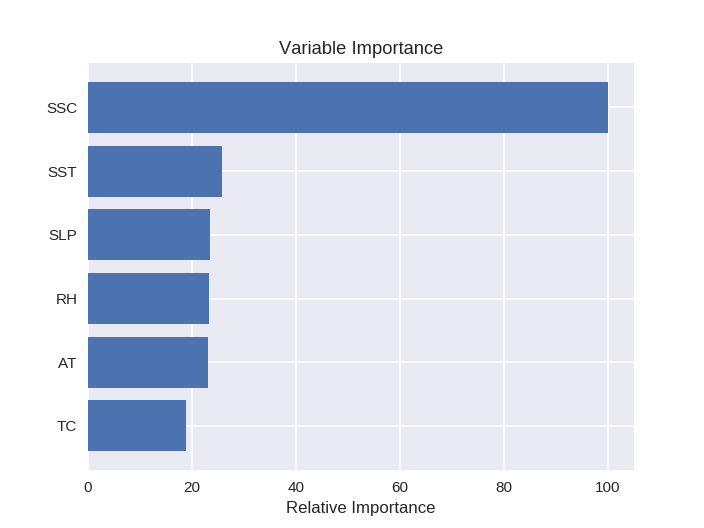

In [29]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .8
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# apply machine learning

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size=0.33, random_state=40)

# SVM

In [77]:
from sklearn import svm

In [78]:
clf = svm.SVC() # svm classifer

In [79]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_recall_curve

In [81]:
result1 = clf.predict(X_test)

In [82]:
confusion_matrix(y_test,result1)

array([[ 0, 10],
       [ 0, 21]])

In [83]:
accuracy_score(y_test,result1)

0.67741935483870963

# Boosted Tree

In [84]:
import xgboost as xgb

In [85]:
model_xgboost = xgb.XGBClassifier() # boosted tree classifire
model_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [86]:
pred = model_xgboost.predict(X_test)
print(accuracy_score(pred,y_test))

0.935483870968


# Decision Tree

In [87]:
from sklearn import tree

In [88]:
clfD = tree.DecisionTreeClassifier()

In [89]:
clfD.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [90]:
result2 = clfD.predict(X_test)

In [91]:
accuracy_score(y_test,result2)

0.93548387096774188

In [92]:
confusion_matrix(y_test,result2)

array([[ 8,  2],
       [ 0, 21]])